## Pupillometry analysis for eye link

Analysis of pupillometry for eye link, based on the previous analysis (pupillometry_2.0) done for pupil labs data.

First step, to open and clean eye link data

## Data loading

As usual we start by importing the modules we need and loading some
`example data <eyelink-dataset>`: eye-tracking data recorded from SR research's
``'.asc'`` file format, and EEG data recorded from EGI's ``'.mff'`` file format. We'll
pass ``create_annotations=["blinks"]`` to :func:`~mne.io.read_raw_eyelink` so that
only blinks annotations are created (by default, annotations are created for blinks,
saccades, fixations, and experiment messages).



In [1]:
import mne
from mne.datasets.eyelink import data_path
from mne.preprocessing.eyetracking import read_eyelink_calibration
from pathlib import Path
import pandas as pd 
import numpy as np

et_fpath = Path('data') / "001_2023_07_19_12_46.asc"


raw_et = mne.io.read_raw_eyelink(et_fpath, preload=True, create_annotations=['blinks','messages'])


Loading z:\lab\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\eye_link\data\001_2023_07_19_12_46.asc
Pixel coordinate data detected.Pass `scalings=dict(eyegaze=1e3)` when using plot method to make traces more legible.
Pupil-size area detected.
There are 57 recording blocks in this file. Times between  blocks will be annotated with BAD_ACQ_SKIP.


In [2]:
raw_et.annotations.description

array(['Obj0183_Asset0007.tif', 'image_onset', 'BAD_blink', 'BAD_blink',
       'BAD_blink', 'BAD_blink', 'image_offset', 'blank_screen',
       'BAD_ACQ_SKIP', 'Obj0196_Asset0022.tif', 'image_onset',
       'BAD_blink', 'BAD_blink', 'image_offset', 'blank_screen',
       'BAD_ACQ_SKIP', 'Obj0208_Asset0036.tif', 'image_onset',
       'BAD_blink', 'BAD_blink', 'BAD_blink', 'BAD_blink', 'image_offset',
       'blank_screen', 'BAD_ACQ_SKIP', 'image_onset',
       'Obj0205_Asset0033.tif', 'BAD_blink', 'BAD_blink', 'BAD_blink',
       'BAD_blink', 'image_offset', 'blank_screen', 'BAD_blink',
       'BAD_blink', 'BAD_ACQ_SKIP', 'Obj0108_Asset0046.tiff',
       'image_onset', 'BAD_blink', 'BAD_blink', 'BAD_blink', 'BAD_blink',
       'BAD_blink', 'BAD_blink', 'image_offset', 'blank_screen',
       'BAD_ACQ_SKIP', 'BAD_blink', 'BAD_blink', 'Obj0185_Asset0009.tif',
       'image_onset', 'BAD_blink', 'BAD_blink', 'BAD_blink', 'BAD_blink',
       'image_offset', 'blank_screen', 'BAD_ACQ_SKIP', 'B

In [3]:
raw_et.annotations.onset

array([1.08000e-01, 1.08000e-01, 1.63200e+00, 1.63200e+00, 4.85000e+00,
       4.85400e+00, 6.10000e+00, 6.10400e+00, 6.20500e+00, 7.79200e+00,
       7.79200e+00, 1.14500e+01, 1.14520e+01, 1.37810e+01, 1.37880e+01,
       1.38910e+01, 1.62100e+01, 1.62100e+01, 1.83660e+01, 1.83660e+01,
       2.13460e+01, 2.13560e+01, 2.21970e+01, 2.22060e+01, 2.23070e+01,
       2.41760e+01, 2.41760e+01, 2.57980e+01, 2.58060e+01, 2.91300e+01,
       2.91360e+01, 3.01640e+01, 3.01710e+01, 3.02600e+01, 3.02680e+01,
       3.02730e+01, 3.34750e+01, 3.34750e+01, 3.57380e+01, 3.57440e+01,
       3.68480e+01, 3.68540e+01, 3.77560e+01, 3.77600e+01, 3.94640e+01,
       3.94710e+01, 3.95730e+01, 4.15360e+01, 4.15360e+01, 4.16600e+01,
       4.16600e+01, 4.53420e+01, 4.53440e+01, 4.66960e+01, 4.66960e+01,
       4.76470e+01, 4.76540e+01, 4.77550e+01, 5.02360e+01, 5.02360e+01,
       5.03610e+01, 5.03610e+01, 5.16800e+01, 5.16880e+01, 5.39560e+01,
       5.39620e+01, 5.49240e+01, 5.49660e+01, 5.60020e+01, 5.601

The info structure of the eye-tracking data 

In [4]:
raw_et.info

<Info | 7 non-empty values
 bads: []
 ch_names: xpos_left, ypos_left, pupil_left, xpos_right, ypos_right, ...
 chs: 4 Eye-tracking (Gaze position), 2 Eye-tracking (Pupil size)
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2023-07-19 01:51:07 UTC
 nchan: 6
 projs: []
 sfreq: 500.0 Hz
>

In [5]:
raw_et.plot()

Using qt as 2D backend.


In [6]:
print(raw_et.annotations[0]["ch_names"])  # a blink in the right eye


()


## Checking the calibration

EyeLink ``.asc`` files can also include calibration information.
MNE-Python can load and visualize those eye-tracking calibrations, which
is a useful first step in assessing the quality of the eye-tracking data.
:func:`~mne.preprocessing.eyetracking.read_eyelink_calibration`
will return a list of :class:`~mne.preprocessing.eyetracking.Calibration` instances,
one for each calibration. We can index that list to access a specific calibration.

In [7]:
cals = read_eyelink_calibration(et_fpath)
print(f"number of calibrations: {len(cals)}")
first_cal = cals[0]  # let's access the first (and only in this case) calibration
print(first_cal)

Reading calibration data from z:\lab\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\eye_link\data\001_2023_07_19_12_46.asc
number of calibrations: 2
Calibration |
  onset: -31.303 seconds
  model: HV9
  eye: left
  average error: 0.62 degrees
  max error: 1.36 degrees
  screen size: None meters
  screen distance: None meters
  screen resolution: None pixels



Calibrations have dict-like attribute access; in addition to the attributes shown in
the output above, additional attributes are ``'positions'`` (the x and y coordinates
of each calibration point), ``'gaze'`` (the x and y coordinates of the actual gaze
position to each calibration point), and ``'offsets'`` (the offset in visual degrees
between the calibration position and the actual gaze position for each calibration
point). Below is an example of how to access these data:

In [8]:
print(f"offset of the first calibration point: {first_cal['offsets'][0]}")
print(f"offset for each calibration point: {first_cal['offsets']}")
print(f"x-coordinate for each calibration point: {first_cal['positions'].T[0]}")

offset of the first calibration point: 0.49
offset for each calibration point: [0.49 0.82 0.44 0.63 0.64 0.68 1.36 0.26 0.47]
x-coordinate for each calibration point: [ 960.  960.  960.  115. 1804.  216. 1703.  216. 1703.]


Let's plot the calibration to get a better look. Below we see the location that each
calibration point was displayed (gray dots), the positions of the actual gaze (red),
and the offsets (in visual degrees) between the calibration position and the actual
gaze position of each calibration point.


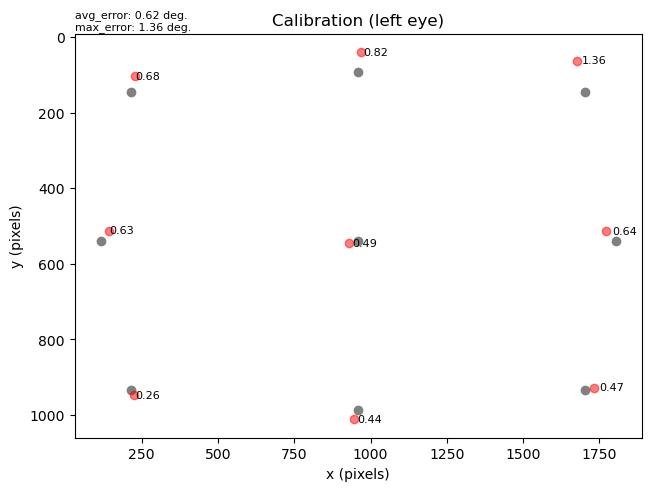

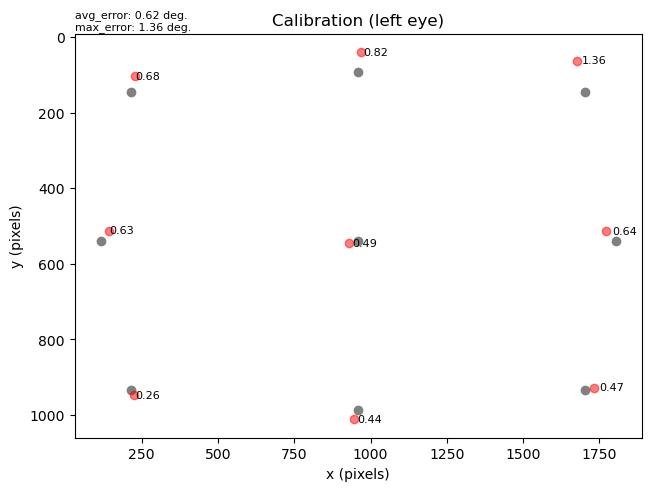

In [9]:
first_cal.plot()

## Plot the raw eye-tracking data

Let's plot the raw eye-tracking data. We'll pass a custom `dict` into
the scalings argument to make the eyegaze channel traces legible when plotting,
since this file contains pixel position data (as opposed to eye angles,
which are reported in radians).

In [10]:
raw_et.plot(scalings=dict(eyegaze=1e3))

## Handling blink artifacts

Naturally, there are blinks in our data, which occur within ``"BAD_blink"``
annotations. During blink periods, eyegaze coordinates are not reported, and pupil
size data are ``0``. We don't want these blink artifacts biasing our analysis, so we
have two options: Drop the blink periods from our data during epoching, or interpolate
the missing data during the blink periods. For this tutorial, let's interpolate the
blink samples. We'll pass ``(0.05, 0.2)`` to
:func:`~mne.preprocessing.eyetracking.interpolate_blinks`, expanding the interpolation
window 50 ms before and 200 ms after the blink, so that the noisy data surrounding
the blink is also interpolated.


In [11]:
mne.preprocessing.eyetracking.interpolate_blinks(raw_et, buffer=(0.05, 0.2))

Interpolating missing data during blinks...
Removing 'BAD_' from BAD_blink.


<RawEyelink | 001_2023_07_19_12_46.asc, 6 x 240136 (480.3 s), ~11.0 MB, data loaded>

.. important:: By default, :func:`~mne.preprocessing.eyetracking.interpolate_blinks`,
          will only interpolate blinks in pupil channels. Passing
          ``interpolate_gaze=True`` will also interpolate the blink periods of the
          eyegaze channels. Be aware, however, that eye movements can occur
          during blinks which makes the gaze data less suitable for interpolation.

In [12]:
raw_et.plot(scalings=dict(eyegaze=1e3))

## Extract common stimulus events from the data

In this experiment, a photodiode attached to the display screen was connected to both
the EEG and eye-tracking systems. The photodiode was triggered by the the light flash
stimuli, causing a signal to be sent to both systems simultaneously, signifying the
onset of the flash. The photodiode signal was recorded as a digital input channel in
the EEG and eye-tracking data. MNE loads these data as a :term:`stim channel`.

We'll extract the flash event onsets from both the EEG and eye-tracking data, as they
are necessary for aligning the data from the two recordings.

## Create the dataframe with temporal values

In [14]:
data_raw=raw_et.get_data(return_times=True)
timestamps=data_raw[1].reshape(len(data_raw[1]),1)
data_raw_values=data_raw[0].T
data_rew_time=np.append(data_raw_values,timestamps,axis=1)
col_n=raw_et.ch_names
col_n.append('time')
data_pd=pd.DataFrame(data_rew_time,
                     columns=col_n
                     )




### Create dataframe for annotations

In [ ]:
data_raw=raw_et.get_data()


ValueError: All picks must be < n_channels (6), got None

In [24]:
raw_et.annotations.description
# raw_et.annotations.onset
annotations_pd=pd.DataFrame({'time':raw_et.annotations.onset,
                             'label': raw_et.annotations.description})

### Cut all data by annotations of interest

In [68]:
# pupil_pd_frame=final_df
import sys
from IPython.display import display
sys.path.append('../../')
sys.path.append('../')
import importlib 
import commons as cm
from pyeyemo import pupillometry2_0_commons as pc 
importlib.reload(pc)


event_initial=annotations_pd['label'].values[0]
event_final=annotations_pd['label'].values[-1]

initial_anotation,_,_=cm.extract_annotations_timestamps(event_initial,'label',annotations_pd)
end_anotation=annotations_pd.iloc[-1]
display(initial_anotation)
display(end_anotation)

pupil_pd_frame=cm.filter_rows_by_temporal_values(
         dataframe=data_pd,
         time_column='time',
         ini_value=initial_anotation['time'].values[0],
         end_value=end_anotation['time']
         )

,time,label
0,0.108,Obj0183_Asset0007.tif


time           480.17
label    blank_screen
Name: 641, dtype: object

In [69]:
%matplotlib qt
filter_events=annotations_pd['label'].str.contains('.tif') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')

fig,ax=pc.plot_signal_with_events(signal_df=pupil_pd_frame,
                           annotattion_df=annotations_pd[filter_events],
                           time_col='time',
                           signal_col='pupil_left')
# ax.set_title(f'raw data for subject: {subject}')

# fig.savefig(f'figures/{subject}_Raw.png', dpi=300)

In [65]:
pupil_pd_frame

,xpos_left,ypos_left,pupil_left,xpos_right,ypos_right,pupil_right,time
54,934.6,566.9,601.0,973.2,553.6,738.0,0.108
55,934.4,567.8,599.0,974.3,553.4,738.0,0.110
56,935.1,568.0,598.0,975.2,554.3,739.0,0.112
57,936.0,568.4,600.0,973.9,554.7,739.0,0.114
58,935.8,568.5,600.0,972.1,554.2,738.0,0.116
...,...,...,...,...,...,...,...
240080,644.5,395.8,707.0,622.3,368.3,827.0,480.160
240081,645.1,395.9,709.0,622.2,368.3,828.0,480.162
240082,645.8,396.4,710.0,622.3,368.2,827.0,480.164
240083,644.8,395.5,707.0,622.2,369.5,824.0,480.166


In [ ]:
raw_et.crop_by_annotations(annotations=annotations_pd)
mne.Annotations

TypeError: string indices must be integers, not 'str'